Chapter 28  
# K-means
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

## Load the Iris dataset

In [5]:
iris = datasets.load_iris()

# Only use the first two features: sepal length and sepal width
X_train = iris.data[:, :2]

# True class labels (not used in training, only for comparison)
y_train = iris.target

## Apply K-Means clustering

In [7]:
# Create a KMeans object with 3 clusters (since there are 3 iris species)
kmeans = KMeans(n_clusters=3, n_init='auto')

# Fit the KMeans model to the training data (unsupervised learning)
kmeans.fit(X_train)

C:\Users\james\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## Generate a mesh grid for visualization

In [9]:
# Define the step size for the grid
plot_step = 0.02

# Create a grid covering the feature space
xx, yy = np.meshgrid(
    np.linspace(4, 8, int(4 / plot_step + 1)),
    np.linspace(1.5, 4.5, int(3 / plot_step + 1))
)

# Predict cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape predictions to match the grid shape
Z = Z.reshape(xx.shape)

## Visualization of K-Means results

In [11]:
# Define background color map for cluster regions
rgb = [
    [255, 238, 255],  # light red
    [219, 238, 244],  # light blue
    [228, 228, 228]   # light gray
]
rgb = np.array(rgb) / 255.
cmap_light = ListedColormap(rgb)

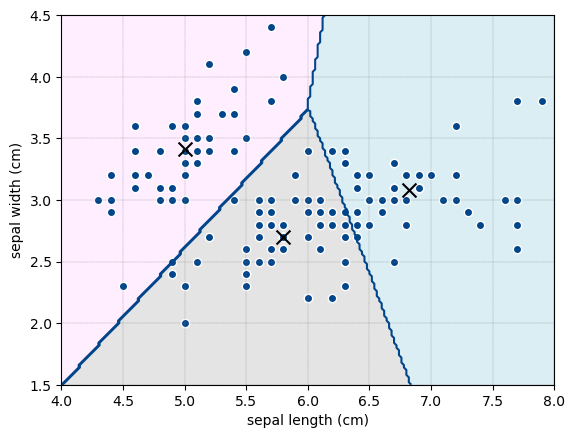

In [12]:
fig, ax = plt.subplots()

# Plot cluster regions (Voronoi-like areas)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot sample data points in feature space
plt.scatter(
    x=X_train[:, 0], y=X_train[:, 1],
    color=np.array([0, 68, 138]) / 255.,
    alpha=1.0, linewidth=1, edgecolor=[1, 1, 1]
)

# Plot decision boundaries between clusters
plt.contour(xx, yy, Z, levels=[0, 1, 2], colors=np.array([0, 68, 138]) / 255.)

# Plot the cluster centroids (means of each cluster)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker="x", s=100, linewidths=1.5, color="k"
)

# Customize axis ticks, limits, and labels
ax.set_xticks(np.arange(4, 8.5, 0.5))
ax.set_yticks(np.arange(1.5, 5, 0.5))
ax.set_xlim(4, 8)
ax.set_ylim(1.5, 4.5)
plt.xlabel(iris.feature_names[0])  # "sepal length (cm)"
plt.ylabel(iris.feature_names[1])  # "sepal width (cm)"

# Add gridlines and set aspect ratio
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_aspect('equal')